# Campaign Expenditures

The Federal Election Commission (FEC) is an independent regulatory agency established in 1975 to administer and enforce the Federal Election Campaign Act (FECA), which requires public disclosure of campaign finance information. The FEC publishes campaign finance reports for presidential and legislative election campaign candidates on the Campaign Finance Disclosure Portal.

The finance summary report contains one record for each financial report (Form 3P) filed by the presidential campaign committees during the 2016 primary and general election campaigns. Presidential committees file quarterly prior to the election year and monthly during the election year. The campaign expenditures file contains individual operating expenditures made by the campaign committee and reported on Form 3P Line 23 during the same period. Operating expenditures consist of the routine costs of campaigning for president, which include staffing, travel, advertising, voter outreach, and other activities.

https://www.kaggle.com/fec/presidential-campaign-finance

Goal: Provide some context of campaign contributions via basic information and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
exp = pd.read_csv('expenditures.csv')

In [3]:
exp.head()

,committee_id,candidate_id,candidate_name,recipient_name,disbursement_amount,disbursement_date,recipient_city,recipient_state,recipient_zipcode,disbursement_desc,memo_code,memo_text,form_type,file_number,transaction_id,election_type
0,C00458844,P60006723,"RUBIO, MARCO","GREEN, PERRY MR.",500.00,15-Sep-15,ANCHORAGE,AK,995084442,IN-KIND CONTRIBUTION,NaN,IN KIND: FACILITY RENTAL,SB23,1031526,SB23.831217,P2016
1,C00458844,P60006723,"RUBIO, MARCO",ALASKA REPUBLICAN PARTY,2500.00,16-Nov-15,ANCHORAGE,AK,99503,BALLOT ACCESS,NaN,NaN,SB23,1047126,SB23.I14767,NaN
2,C00458844,P60006723,"RUBIO, MARCO","JOHNSON, MARK",1000.00,30-Sep-15,ANCHORAGE,AK,995163436,IN-KIND CONTRIBUTION,NaN,IN KIND: BUMPER STICKERS SIGNS AND BUTTONS,SB23,1031526,SB23.831218,P2016
3,C00458844,P60006723,"RUBIO, MARCO",ENTERPRISE,336.09,18-Dec-15,BIRMINGHAM,AL,352124572,CAR RENTAL,X,NaN,SB23,1047126,SB23.I15112,NaN
4,C00458844,P60006723,"RUBIO, MARCO",U.S. SPACE AND ROCKET CENTER,2000.00,7-Apr-16,HUNTSVILLE,AL,35805,SITE RENTAL,NaN,NaN,SB23,1073515,SB23.4226,P2016


In [4]:
exp.shape

(65499, 16)

In [5]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 16 columns):
committee_id           65499 non-null object
candidate_id           65499 non-null object
candidate_name         65499 non-null object
recipient_name         65499 non-null object
disbursement_amount    65499 non-null float64
disbursement_date      65499 non-null object
recipient_city         65497 non-null object
recipient_state        65499 non-null object
recipient_zipcode      65479 non-null object
disbursement_desc      65496 non-null object
memo_code              41828 non-null object
memo_text              1297 non-null object
form_type              65499 non-null object
file_number            65499 non-null int64
transaction_id         65499 non-null object
election_type          28806 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.0+ MB


In [6]:
exp.describe()

,disbursement_amount,file_number
count,6.549900e+04,6.549900e+04
mean,9.611805e+03,1.073751e+06
std,2.154950e+05,3.116556e+04
min,-6.664816e+04,1.003942e+06
25%,5.482000e+01,1.053893e+06
50%,2.578800e+02,1.073637e+06
75%,8.248150e+02,1.091720e+06
max,2.478334e+07,1.133832e+06


# Basic Questions

List all candidates and the number of campaign contributions received.

In [7]:
exp['candidate_name'].value_counts().head(10)

CLINTON, HILLARY RODHAM      23181
RUBIO, MARCO                 15200
CRUZ, RAFAEL EDWARD 'TED'    11857
CARSON, BENJAMIN S.          10199
PAUL, RAND                    4070
PERRY, JAMES R. (RICK)         986
SANTORUM, RICHARD J.             6
Name: candidate_name, dtype: int64

In [8]:
print('Mean Amount Given')
exp['disbursement_amount'].mean()

Mean Amount Given


9611.804917480138

How many people gave more than the average amount?

In [9]:
exp[exp['disbursement_amount']>9611.804917480138].count().head()

committee_id           3954
candidate_id           3954
candidate_name         3954
recipient_name         3954
disbursement_amount    3954
dtype: int64

Input maximum amount given.

In [10]:
exp['disbursement_amount'].max()

24783344.539999999

For which candidate?

In [11]:
exp[exp['disbursement_amount']==24783344.539999999]['candidate_name']

54422    CLINTON, HILLARY RODHAM
Name: candidate_name, dtype: object

From which state?

In [12]:
exp[exp['disbursement_amount']==24783344.539999999]['recipient_state']

54422    DC
Name: recipient_state, dtype: object

What were the top 5 ways in which contributions were made?

In [13]:
exp['disbursement_desc'].value_counts().head()

TRAVEL                    19123
PAYROLL                    2903
AIRFARE                    2864
LODGING                    2530
TRAVEL AND SUBSISTENCE     2389
Name: disbursement_desc, dtype: int64

List top 5 contributing states.

In [14]:
exp['recipient_state'].value_counts().head()

CA    10392
DC     9076
TX     8598
GA     7288
IA     3655
Name: recipient_state, dtype: int64

# Exploratory Data Analysis

Check for any missing values.

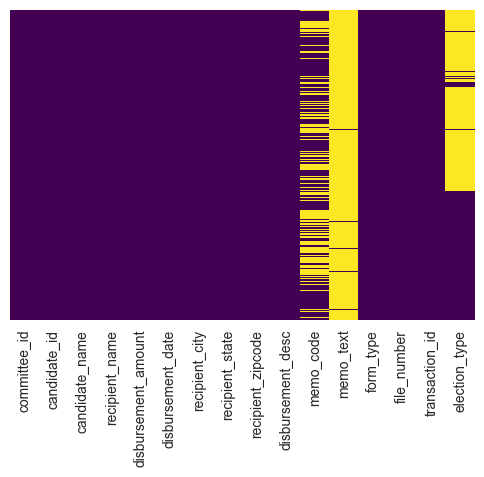

In [16]:
#exp.isnull().sum()
sns.heatmap(exp.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
exp.dropna(inplace=True)

In [18]:
exp.head()

,committee_id,candidate_id,candidate_name,recipient_name,disbursement_amount,disbursement_date,recipient_city,recipient_state,recipient_zipcode,disbursement_desc,memo_code,memo_text,form_type,file_number,transaction_id,election_type
44719,C00575795,P00003392,"CLINTON, HILLARY RODHAM","MOGANNAM, SAM",340.00,4-Nov-16,SAN FRANCISCO,CA,941101531,"CATERING, FOOD & BEVERAGES",X,* IN-KIND RECEIVED,SB23,1133832,D351304,G2016
47805,C00575795,P00003392,"CLINTON, HILLARY RODHAM","FRIEDMAN, JEFF",2034.00,31-May-16,SACRAMENTO,CA,958142053,RENT,X,* IN-KIND RECEIVED,SB23,1091720,D211769,P2016
49598,C00575795,P00003392,"CLINTON, HILLARY RODHAM","NORRIS, WENDI",350.00,1-Jul-15,SAN FRANCISCO,CA,941054017,VENUE,X,* IN-KIND RECEIVED,SB23,1081046,D6313,P2016
50413,C00575795,P00003392,"CLINTON, HILLARY RODHAM","YANG, LISA",150.00,22-Mar-16,LOS ANGELES,CA,900382299,VENUE,X,* IN-KIND RECEIVED,SB23,1081062,D170486,P2016
50858,C00575795,P00003392,"CLINTON, HILLARY RODHAM","MURPHY, CHARLES JOHN",546.25,21-Feb-16,COLORADO SPRINGS,CO,809061533,TRANSPORTATION,X,* IN-KIND RECEIVED,SB23,1093618,D157651,P2016


In [23]:
exp.shape

(7, 16)

Anymore missing data?

In [19]:
exp.isnull().sum()

committee_id           0
candidate_id           0
candidate_name         0
recipient_name         0
disbursement_amount    0
disbursement_date      0
recipient_city         0
recipient_state        0
recipient_zipcode      0
disbursement_desc      0
memo_code              0
memo_text              0
form_type              0
file_number            0
transaction_id         0
election_type          0
dtype: int64

Provide new countplot for states.

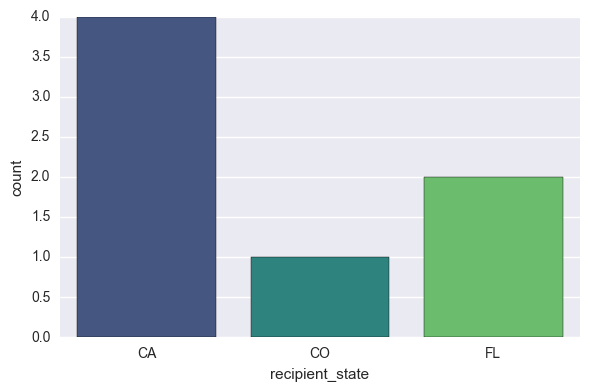

In [22]:
sns.countplot(x='recipient_state',data=exp,palette='viridis')
plt.tight_layout()